<a href="https://colab.research.google.com/github/rbrabusa/cmpt3830_alpaca/blob/man/cmpt3830_phase_1_go_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Loyalty-Driven Dealer Performer Analysis
## GO Auto Services - Exploratory Data Analysis

**Team Members:**

Ramon - [Student ID] - [Email]

Manpreet - [Student ID] - [Email]

Kiran - [Student ID] - [Email]

### Problem Statement: Loyalty-Driven Dealer Performance (Clustering + Comparative Analysis)

#### Goal: Analyze how loyalty program participation impacts dealership performance and customer behavior. The objective is to identify whether dealerships with higher loyalty card usage show stronger retention, higher average gross revenue, and more consistent service activity compared to those with lower adoption rates.

#### Use Cases:
- Loyalty Impact by Dealer: Compare dealerships to see which locations benefit most from loyalty card usage (e.g., higher repeat visits, higher average cost per service).
- Customer Segmentation by Loyalty: Cluster customers into groups such as “loyalty-driven repeat clients,” “occasional users,” and “non-loyalty walk-ins,” and compare their service patterns across dealerships.
- Dealer benchmarking: Evaluate whether dealerships with high loyalty participation also outperform in revenue, retention, and service frequency compared to those with low participation
- Distance Insights: Explore if loyalty members are more willing to travel longer distances to specific dealerships


#### Outcome:
- Clusters of dealerships grouped by loyalty adoption and performance.
- Customer segments showing different loyalty-driven behaviors.
- A performance dashboard that highlights which dealerships use loyalty effectively and which may need support.
- Actionable recommendations for leadership on how to leverage the loyalty program to improve dealer performance, customer retention, and revenue.


### Demo 1 Objectives
1. Assess data quality and understand loyalty program distribution
2. Explore preliminary patterns in loyalty vs. non-loyalty customer behavior.
3. Conduct initial dealer-level performance comparison
4. Set foundation for clustering analysis in Demo 2

TEST COMMITTTT

#EDA

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('GoAutoServices.csv')


In [ ]:
df

,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance
0,7/29/2024 0:00,Apr-21,1,0,2021,TOYO,RAV4HY,3395527356,Yes,200-300,True,39076,Toyota on the Trail,9.0
1,7/30/2024 0:00,Dec-23,1,1,2024,TOYO,RAV4HY,5296888873,Yes,0-100,True,39556,Toyota on the Trail,12.0
2,7/2/2024 0:00,Mar-20,1,1,2020,LAND,RR,9475224721,No,1300-1400,True,66001,Jaguar Land Rover Edmonton,10.8
3,7/3/2024 0:00,Jul-23,1,1,2018,NISS,PATH,3446880696,No,500-600,True,82454,Go Nissan South,15.3
4,10/30/2022 0:00,May-11,1,0,2008,FORD,FUSN,5577514554,No,0-100,True,5,Kentwood Ford,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242813,9/18/2023 0:00,Feb-23,1,0,2020,FORD,F150,1813236058,Yes,1400-1500,True,104768,Kentwood Ford,10.2
242814,4/17/2020 0:00,Aug-17,1,0,2017,FORD,F150,6891633666,No,300-400,False,99848,Kentwood Ford,4.0
242815,2/12/2021 0:00,May-15,1,0,2015,FORD,F150,1516333102,No,300-400,False,110669,Kentwood Ford,24.4
242816,1/20/2021 0:00,Jan-19,1,0,2018,FORD,F150,5245369000,No,200-300,False,66496,Kentwood Ford,5.7


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.describe()

,customer_pay,warranty_pay,year,vin,mileage,distance
count,242818.000000,242818.000000,242818.000000,2.428180e+05,2.428180e+05,242818.000000
mean,0.841910,0.382365,2018.015135,5.508742e+09,6.689293e+04,43.090641
std,0.364826,0.485966,3.187028,2.587574e+09,6.255440e+04,155.906911
min,0.000000,0.000000,1985.000000,1.000168e+09,0.000000e+00,0.000000
25%,1.000000,0.000000,2016.000000,3.277858e+09,2.398500e+04,5.800000
50%,1.000000,0.000000,2018.000000,5.532262e+09,5.212800e+04,10.600000
75%,1.000000,1.000000,2020.000000,7.728695e+09,9.496775e+04,18.900000
max,1.000000,1.000000,2025.000000,9.999990e+09,1.000000e+07,4212.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242818 entries, 0 to 242817
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   service_date  242818 non-null  object 
 1   sale_date     242818 non-null  object 
 2   customer_pay  242818 non-null  int64  
 3   warranty_pay  242818 non-null  int64  
 4   year          242818 non-null  int64  
 5   make          242818 non-null  object 
 6   model         242818 non-null  object 
 7   vin           242818 non-null  int64  
 8   loyalty_card  242813 non-null  object 
 9   cost          240095 non-null  object 
 10  appointment   242818 non-null  bool   
 11  mileage       242818 non-null  int64  
 12  dealer_name   242818 non-null  object 
 13  distance      242818 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 24.3+ MB


In [ ]:
Categorical_columns = df.select_dtypes(include=['object']).columns
print(f'Categorical features: {len(Categorical_columns)}')
for col in Categorical_columns:
    print(f'{col}: {df[col].nunique()}')

Categorical features: 7
service_date: 1543
sale_date: 180
make: 66
model: 896
loyalty_card: 2
cost: 253
dealer_name: 7


In [ ]:
dup_count = df.duplicated().sum()
print(f'Number of duplicate rows: {dup_count}')

Number of duplicate rows: 0


In [ ]:
#Removing duplicate values
df.drop_duplicates(inplace=True)
df

,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance
0,2024-07-29,2021-04-01,1,0,2021,TOYO,RAV4HY,3395527356,Yes,200-300,True,39076,Toyota on the Trail,9.0
1,2024-07-30,2023-12-01,1,1,2024,TOYO,RAV4HY,5296888873,Yes,0-100,True,39556,Toyota on the Trail,12.0
2,2024-07-02,2020-03-01,1,1,2020,LAND,RR,9475224721,No,1300-1400,True,66001,Jaguar Land Rover Edmonton,10.8
3,2024-07-03,2023-07-01,1,1,2018,NISS,PATH,3446880696,No,500-600,True,82454,Go Nissan South,15.3
4,2022-10-30,2011-05-01,1,0,2008,FORD,FUSN,5577514554,No,0-100,True,5,Kentwood Ford,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242813,2023-09-18,2023-02-01,1,0,2020,FORD,F150,1813236058,Yes,1400-1500,True,104768,Kentwood Ford,10.2
242814,2020-04-17,2017-08-01,1,0,2017,FORD,F150,6891633666,No,300-400,False,99848,Kentwood Ford,4.0
242815,2021-02-12,2015-05-01,1,0,2015,FORD,F150,1516333102,No,300-400,False,110669,Kentwood Ford,24.4
242816,2021-01-20,2019-01-01,1,0,2018,FORD,F150,5245369000,No,200-300,False,66496,Kentwood Ford,5.7


#Removing null values

In [ ]:
df.isnull().sum()

,0
service_date,1
sale_date,0
customer_pay,0
warranty_pay,0
year,0
make,0
model,0
vin,0
loyalty_card,5
cost,2723


In [ ]:
#forward fill
df['service_date'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-3455717666.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['service_date'].fillna(method='ffill', inplace=True)


In [ ]:
df.isnull().sum()

,0
service_date,0
sale_date,0
customer_pay,0
warranty_pay,0
year,0
make,0
model,0
vin,0
loyalty_card,5
cost,2723


Convert other features to string datatype. Make, model , loyalty_card. Cost we will do later.

---



In [ ]:
df['service_date'] = pd.to_datetime(df['service_date'], errors='coerce', format='mixed')
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%b-%y', errors='coerce')

In [ ]:
df.dtypes

,0
service_date,datetime64[ns]
sale_date,datetime64[ns]
customer_pay,int64
warranty_pay,int64
year,int64
make,object
model,object
vin,int64
loyalty_card,object
cost,object


The column that we need for this project problem are : loyaly_card, customer_pay, warranty_pay, distance, dealer_name, service_date, sale_date, year, make, model, for cost we will make groups based on the price category(medium, high and low)  which will be usefull in phase 2.

We have to clear the cost column as well as we are going to need that for demo 2 but it is not required for demo 1




In [ ]:
GoAuto_df= df[['service_date','sale_date','customer_pay','warranty_pay','dealer_name','make','model','year','loyalty_card','distance']]
GoAuto_df

,service_date,sale_date,customer_pay,dealer_name,make,model,year,loyalty_card,distance
0,2024-07-29,2021-04-01,1,Toyota on the Trail,TOYO,RAV4HY,2021,Yes,9.0
1,2024-07-30,2023-12-01,1,Toyota on the Trail,TOYO,RAV4HY,2024,Yes,12.0
2,2024-07-02,2020-03-01,1,Jaguar Land Rover Edmonton,LAND,RR,2020,No,10.8
3,2024-07-03,2023-07-01,1,Go Nissan South,NISS,PATH,2018,No,15.3
4,2022-10-30,2011-05-01,1,Kentwood Ford,FORD,FUSN,2008,No,4.8
...,...,...,...,...,...,...,...,...,...
242813,2023-09-18,2023-02-01,1,Kentwood Ford,FORD,F150,2020,Yes,10.2
242814,2020-04-17,2017-08-01,1,Kentwood Ford,FORD,F150,2017,No,4.0
242815,2021-02-12,2015-05-01,1,Kentwood Ford,FORD,F150,2015,No,24.4
242816,2021-01-20,2019-01-01,1,Kentwood Ford,FORD,F150,2018,No,5.7


In [ ]:
GoAuto_df.isnull().sum()

,0
service_date,0
sale_date,0
customer_pay,0
dealer_name,0
make,0
model,0
year,0
loyalty_card,5
distance,0


after cleaning save the cleaned dataset as a csv file

In [ ]:
GoAuto_df.dtypes

,0
service_date,datetime64[ns]
sale_date,datetime64[ns]
customer_pay,int64
dealer_name,object
make,object
model,object
year,int64
loyalty_card,object
distance,float64


For the loyalty_card feature with decided to replace the null values with No.

replacing all the null values with no in loyalty_card column

In [ ]:
GoAuto_df['loyalty_card'].fillna('No', inplace=True)

/tmp/ipython-input-3067643658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  GoAuto_df['loyalty_card'].fillna('No', inplace=True)
/tmp/ipython-input-3067643658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoAuto_df['loyalty_card'].fillna('No', inplace=True)


In [ ]:
GoAuto_df

,service_date,sale_date,customer_pay,dealer_name,make,model,year,loyalty_card,distance
0,2024-07-29,2021-04-01,1,Toyota on the Trail,TOYO,RAV4HY,2021,Yes,9.0
1,2024-07-30,2023-12-01,1,Toyota on the Trail,TOYO,RAV4HY,2024,Yes,12.0
2,2024-07-02,2020-03-01,1,Jaguar Land Rover Edmonton,LAND,RR,2020,No,10.8
3,2024-07-03,2023-07-01,1,Go Nissan South,NISS,PATH,2018,No,15.3
4,2022-10-30,2011-05-01,1,Kentwood Ford,FORD,FUSN,2008,No,4.8
...,...,...,...,...,...,...,...,...,...
242813,2023-09-18,2023-02-01,1,Kentwood Ford,FORD,F150,2020,Yes,10.2
242814,2020-04-17,2017-08-01,1,Kentwood Ford,FORD,F150,2017,No,4.0
242815,2021-02-12,2015-05-01,1,Kentwood Ford,FORD,F150,2015,No,24.4
242816,2021-01-20,2019-01-01,1,Kentwood Ford,FORD,F150,2018,No,5.7


In [ ]:
GoAuto_df.isnull().sum()

,0
service_date,0
sale_date,0
customer_pay,0
dealer_name,0
make,0
model,0
year,0
loyalty_card,0
distance,0


Trying to find the outliers using z-score (finding z-score of every column).

#Outliers

In [ ]:
from scipy.stats import zscore
GoAuto_df['zscore_customer_pay']=zscore(GoAuto_df['customer_pay'])
GoAuto_df['zscore_distance']=zscore(GoAuto_df['distance'])
GoAuto_df['zscore_year']=zscore(GoAuto_df['year'])
print("Dataset with z-scores")
GoAuto_df

Dataset with z-scores


/tmp/ipython-input-4023408928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoAuto_df['zscore_customer_pay']=zscore(GoAuto_df['customer_pay'])
/tmp/ipython-input-4023408928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoAuto_df['zscore_distance']=zscore(GoAuto_df['distance'])
/tmp/ipython-input-4023408928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,service_date,sale_date,customer_pay,dealer_name,make,model,year,loyalty_card,distance,zscore_customer_pay,zscore_distance,zscore_year
0,2024-07-29,2021-04-01,1,Toyota on the Trail,TOYO,RAV4HY,2021,Yes,9.0,0.43333,-0.218661,0.936569
1,2024-07-30,2023-12-01,1,Toyota on the Trail,TOYO,RAV4HY,2024,Yes,12.0,0.43333,-0.199418,1.877887
2,2024-07-02,2020-03-01,1,Jaguar Land Rover Edmonton,LAND,RR,2020,No,10.8,0.43333,-0.207115,0.622796
3,2024-07-03,2023-07-01,1,Go Nissan South,NISS,PATH,2018,No,15.3,0.43333,-0.178252,-0.004749
4,2022-10-30,2011-05-01,1,Kentwood Ford,FORD,FUSN,2008,No,4.8,0.43333,-0.245600,-3.142475
...,...,...,...,...,...,...,...,...,...,...,...,...
242813,2023-09-18,2023-02-01,1,Kentwood Ford,FORD,F150,2020,Yes,10.2,0.43333,-0.210964,0.622796
242814,2020-04-17,2017-08-01,1,Kentwood Ford,FORD,F150,2017,No,4.0,0.43333,-0.250731,-0.318522
242815,2021-02-12,2015-05-01,1,Kentwood Ford,FORD,F150,2015,No,24.4,0.43333,-0.119884,-0.946067
242816,2021-01-20,2019-01-01,1,Kentwood Ford,FORD,F150,2018,No,5.7,0.43333,-0.239827,-0.004749


<Axes: >

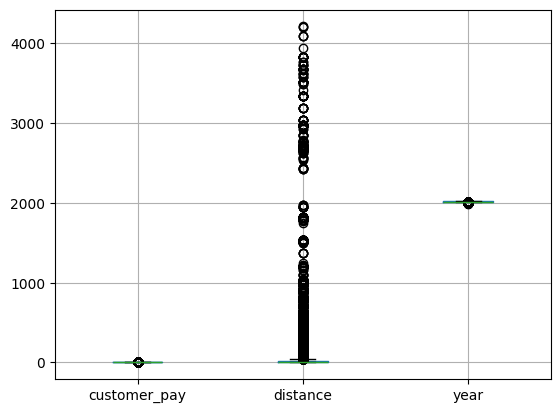

In [ ]:
#Creating box plot of Customer_pay, distace and year column to visulize the outliers.
GoAuto_df.boxplot(column=['customer_pay','distance','year'])

#Visualization

group by vin, dealership, loyalty card (customer segmentation by loyalty)

distance

for presentation, include sprint screenshots progress